**Daten-Generierung und Visualisierung**

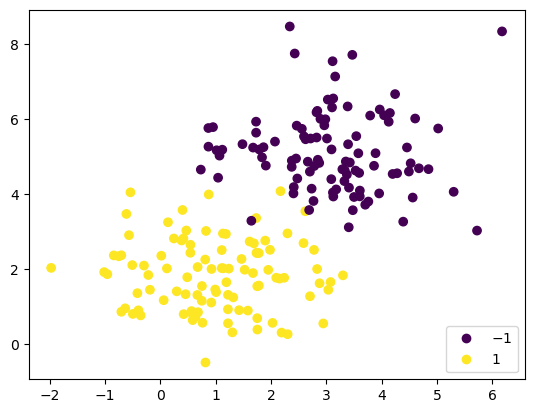

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100) 

def generate_data(n):
    X1 = np.random.multivariate_normal([1,2], [[1,0], [0,1]], int(n/2))
    X2 = np.random.multivariate_normal([3,5], [[1,0], [0,1]], int(n/2))
    X = np.concatenate((X1, X2))
    y = np.concatenate((np.ones(int(n/2)), -np.ones(int(n/2))))
    return X, y

X_train, y_train = generate_data(200)
X_test, y_test = generate_data(100)

scatter = plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.legend(*scatter.legend_elements(), loc=4)
plt.show()


**Modell-Klasse linearNet**

In [17]:
class linearNet:
    def __init__(self, d):
        self.w = np.random.normal(scale = np.sqrt(d), size=(d,1))
        self.b = 0

    def output(self, X):
        return X @ self.w + self.b

    def grad(self, X, y_true, dloss_function):
        output = self.output(X)
        y_true = y_true.reshape(-1,1)
        dloss = dloss_function(y_true, output)
        grad_w = (dloss * X).mean(axis=0).reshape(-1,1)
        grad_b = dloss.mean()
        return grad_w, grad_b

    def fit(self, X_train, y_train, epochs, learning_rate, loss_function, dloss_function):
        loss_hist = []
        accuracy_hist = []
        for i in range(epochs):
            grad_w, grad_b = self.grad(X_train, y_train, dloss_function)
            self.w = self.w - learning_rate * grad_w
            self.b = self.b - learning_rate * grad_b
            output = self.output(X_train)[:,0]
            loss = loss_function(y_train, output)
            accuracy = compute_accuracy(y_train, output)
            loss_hist.append(loss)
            accuracy_hist.append(accuracy)
        plt.title('Loss history')
        plt.plot(loss_hist)
        plt.show()
        print("Most recent loss is", loss)
        plt.title('Accuracy history')
        plt.plot(accuracy_hist)
        plt.show()
        print("Most recent accuracy is "+str(accuracy*100)+"%")


Einfache Klasse, die ein lineares Modell implementiert: Gewichtungsvektor (self.w), Bias (self.b), Vorwärtsausgabe (output).

Die Methode grad berechnet den Gradienten der Verlustfunktion (der wichtigste Teil für das Lernen!).

**Trainingsroutine**

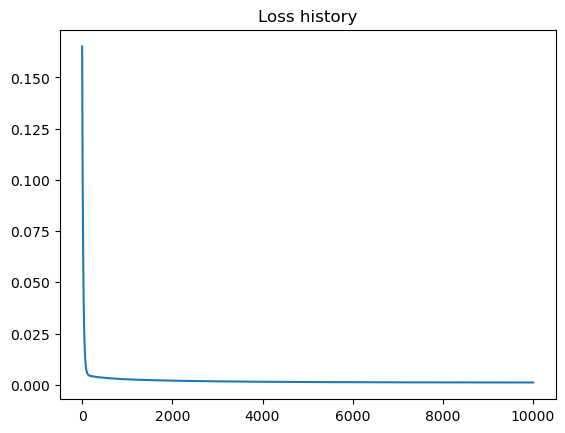

Most recent loss is 0.0010863198692072037


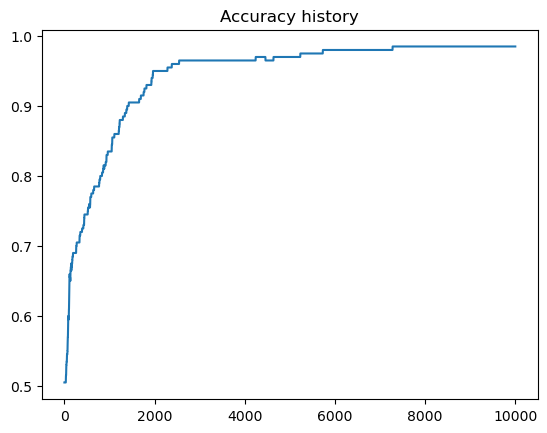

Most recent accuracy is 98.5%


In [18]:
def mse(y_true, output):
    return np.mean(np.power(output-y_true, 2))/y_true.size
def dmse(y_true, output):
    return 2*(output-y_true)/y_true.size

def compute_accuracy(y_true, output):
    y_pred = np.sign(output)
    return (y_true == y_pred).mean()

# Training
net = linearNet(2)
net.fit(X_train, y_train, epochs=10000, learning_rate=0.1, loss_function=mse, dloss_function=dmse)



**Visualisierung der Entscheidungsgrenze („Decision Boundary“)**

Wir erstellen ein Gitter (Grid) über den gesamten Bereich der Eingabedaten.

Für jeden Punkt auf diesem Gitter berechnen wir, zu welcher Klasse das Netz ihn zählen würde.

Die Grenze zwischen den Klassen wird als „Decision Boundary“ gezeichnet.

Zusätzlich werden die Testdaten eingefärbt, um zu sehen, wie gut die Trennung im echten Datensatz funktioniert.

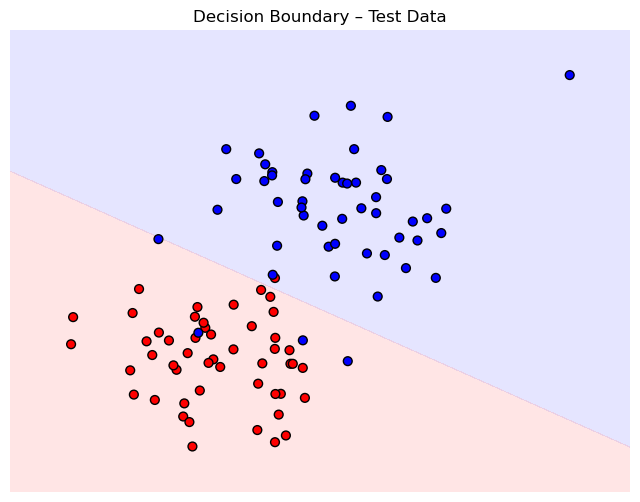

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Verwende die Testdaten
X = X_test
y = y_test

# Schritt 1: Grid (Gitter) für den gesamten Bereich der Daten erzeugen
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, 0.05),
    np.arange(x2_min, x2_max, 0.05)
)

# Schritt 2: Alle Punkte im Grid durch das Netz schicken (Vorhersage berechnen)
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_grid = net.output(X_grid).reshape(xx1.shape)

# Schritt 3: Entscheidungsebene plotten
plt.figure(figsize=(8,6))
plt.contourf(xx1, xx2, y_grid, levels=0, cmap=plt.cm.bwr, alpha=0.2)

# Schritt 4: Testdaten einzeichnen (Punkte in ihren echten Farben)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=40)

plt.title('Decision Boundary – Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis("off")  # optional, für cleaneres Bild
plt.show()


**Nicht-linear trennbares Beispiel – Kreisförmige Klassen (z.B. XOR, „moons“ oder „circles“)**

1. Beispielcode: Lineares Netz auf „Circles“-Daten


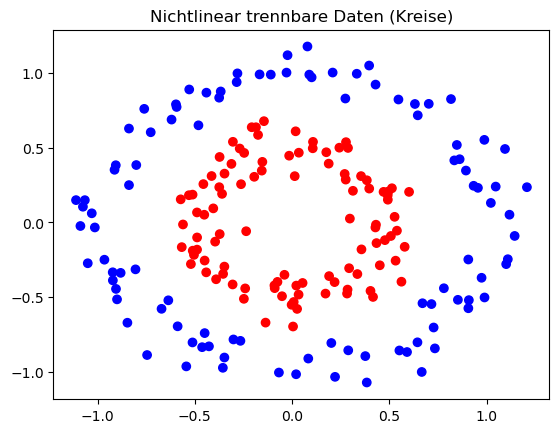

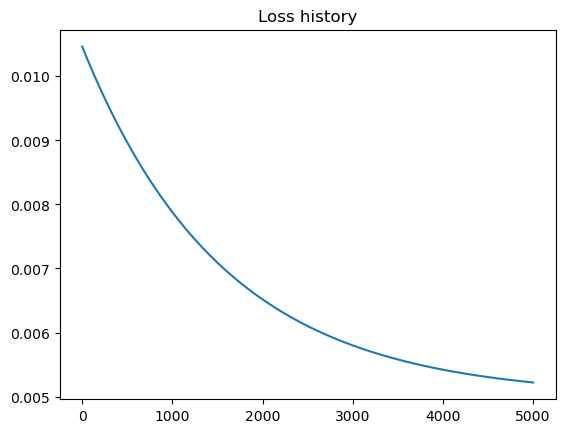

Most recent loss is 0.005220871954551605


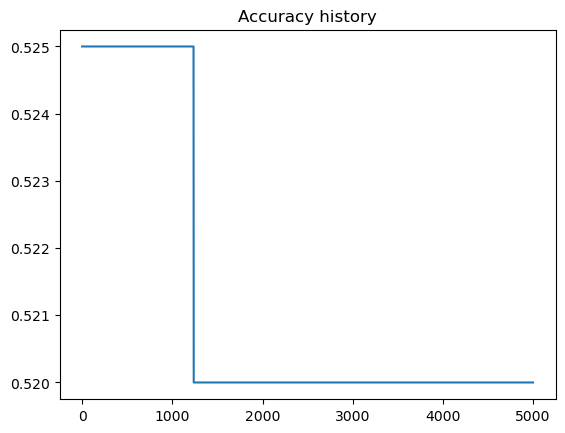

Most recent accuracy is 52.0%


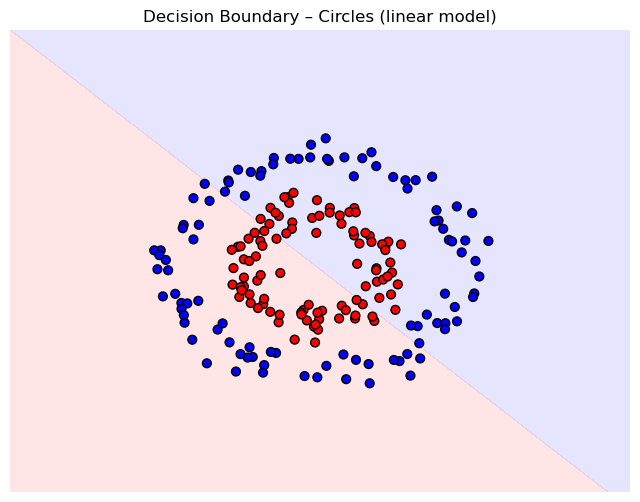

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 1. Daten generieren
X, y = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=1)
# Zielwerte umwandeln zu -1/+1 (wie in deinem Netz)
y = 2 * y - 1

# 2. Daten plotten
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.title("Nichtlinear trennbare Daten (Kreise)")
plt.show()

# 3. Lineares Netz wie vorher trainieren
class linearNet:
    def __init__(self, d):
        self.w = np.random.normal(scale = np.sqrt(d), size=(d,1))
        self.b = 0
    def output(self, X):
        return X @ self.w + self.b
    def grad(self, X, y_true, dloss_function):
        output = self.output(X)
        y_true = y_true.reshape(-1,1)
        dloss = dloss_function(y_true, output)
        grad_w = (dloss * X).mean(axis=0).reshape(-1,1)
        grad_b = dloss.mean()
        return grad_w, grad_b
    def fit(self, X_train, y_train, epochs, learning_rate, loss_function, dloss_function):
        loss_hist = []
        accuracy_hist = []
        for i in range(epochs):
            grad_w, grad_b = self.grad(X_train, y_train, dloss_function)
            self.w = self.w - learning_rate * grad_w
            self.b = self.b - learning_rate * grad_b
            output = self.output(X_train)[:,0]
            loss = loss_function(y_train, output)
            accuracy = compute_accuracy(y_train, output)
            loss_hist.append(loss)
            accuracy_hist.append(accuracy)
        # Plots
        plt.title('Loss history')
        plt.plot(loss_hist)
        plt.show()
        print("Most recent loss is", loss)
        plt.title('Accuracy history')
        plt.plot(accuracy_hist)
        plt.show()
        print("Most recent accuracy is "+str(accuracy*100)+"%")

def mse(y_true, output):
    return np.mean(np.power(output-y_true, 2))/y_true.size
def dmse(y_true, output):
    return 2*(output-y_true)/y_true.size
def compute_accuracy(y_true, output):
    y_pred = np.sign(output)
    return (y_true == y_pred).mean()

# Netz instanziieren und trainieren
net = linearNet(2)
net.fit(X, y, epochs=5000, learning_rate=0.1, loss_function=mse, dloss_function=dmse)

# 4. Entscheidungsgrenze plotten
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05), np.arange(x2_min, x2_max, 0.05))
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_grid = net.output(X_grid).reshape(xx1.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx1, xx2, y_grid, levels=0, cmap=plt.cm.bwr, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=40)
plt.title('Decision Boundary – Circles (linear model)')
plt.axis("off")
plt.show()


Der Plot zeigt zwei ineinanderliegende „Kreise“ (Klassen) – nicht linear trennbar!

Die Entscheidungsgrenze deines linearen Netzes ist trotzdem eine Gerade – egal, wie viel du trainierst.

Das Modell wird viele Punkte auf der „falschen“ Seite lassen → Accuracy deutlich unter 100%.

Loss- und Accuracy-Kurve: Accuracy bleibt irgendwo um 50–70% stecken, Loss stagniert – das Modell kann nicht „verstehen“, wie es die Klassen richtig trennt.

*Was ist die Lehre?*<br>

Lineare Modelle können nur lineare Entscheidungsgrenzen lernen.

Bei nichtlinearer Trennbarkeit sind komplexere Architekturen nötig (z.B. Mehrschicht-Perzeptron, Deep Learning, SVM mit nichtlinearem Kernel, Decision Trees…).

Dieses Beispiel ist der perfekte Einstieg in Deep Learning oder „Why do we need hidden layers?“.


*„Wenn Sie mit einer einzigen Grenze alles trennen können, ist das Problem linear. Wenn Sie sich verbiegen müssen, ist es nichtlinear – dann braucht das Modell mehr Power (z. B. Deep Learning).“*

*„Kredit-Scoring ist ein Paradebeispiel: Klassische Modelle nutzen lineare Schwellen und Scores – aber echte Zahlungsausfälle hängen oft von komplexen, nichtlinearen Kombinationen ab. Moderne KI-Modelle erkennen das und können so das Risiko besser abschätzen – auf Kosten der Transparenz, aber mit höherer Genauigkeit.“*

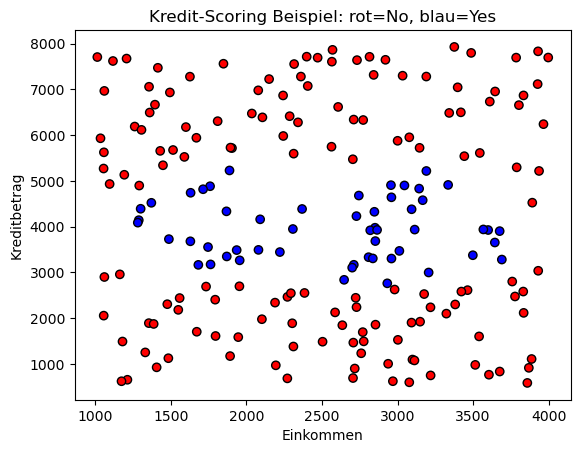

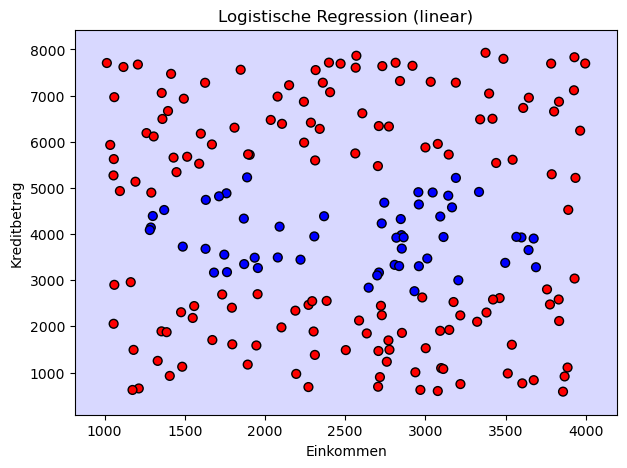

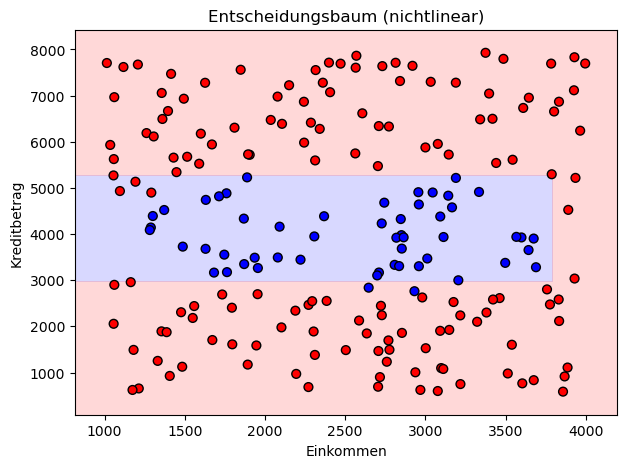

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1. Daten generieren (Einkommen, Kreditbetrag, Ziel: Kredit Ja/Nein)
np.random.seed(0)
n = 200
# Einkommen zwischen 1000 und 4000
income = np.random.uniform(1000, 4000, n)
# Kreditbetrag zwischen 500 und 8000
loan = np.random.uniform(500, 8000, n)

# Ziel: linear trennbar
y_linear = (income - 0.6*loan > 1000).astype(int)

# Ziel: nichtlinear (z.B. „Risikozone“ als Kreis)
center = np.array([2500, 4000])
radius = 1400
y_nonlinear = (((income-center[0])**2 + (loan-center[1])**2) > radius**2).astype(int)

# Wähle, welche Zielvariable du testen willst:
y = y_nonlinear  # für nichtlinear! (für linear: y = y_linear)

X = np.column_stack([income, loan])

# 2. Plot der Datenpunkte
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
plt.xlabel('Einkommen')
plt.ylabel('Kreditbetrag')
plt.title('Kredit-Scoring Beispiel: rot=No, blau=Yes')
plt.show()

# 3. Modelle trainieren
logreg = LogisticRegression()
logreg.fit(X, y)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

# 4. Decision Boundary Plot-Funktion
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 200, X[:, 0].max() + 200
    y_min, y_max = X[:, 1].min() - 500, X[:, 1].max() + 500
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr, levels=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k', s=40)
    plt.xlabel('Einkommen')
    plt.ylabel('Kreditbetrag')
    plt.title(title)
    plt.show()

# 5. Plot für lineares Modell
plot_decision_boundary(logreg, X, y, "Logistische Regression (linear)")

# 6. Plot für Entscheidungsbaum
plot_decision_boundary(tree, X, y, "Entscheidungsbaum (nichtlinear)")


**Entscheidungsbaum (nichtlinear)**<br>
Blauer Bereich: Das Modell erlaubt den Kredit nur für Kunden im „mittleren“ Bereich des Kreditbetrags, unabhängig vom Einkommen (so hat der Baum die Grenze erkannt).<br>
Roter Bereich: Alles außerhalb dieser „Zone“ wird abgelehnt.<br>
Grenze: Klar rechteckig/stufig – typisch für Entscheidungsbäume.<br><br>

*Leistung:*
Jetzt werden deutlich mehr blaue Punkte korrekt erfasst, weil der Baum die komplexere Form erkannt hat (nichtlinear!).
Das Modell „umschließt“ die gute Zone.

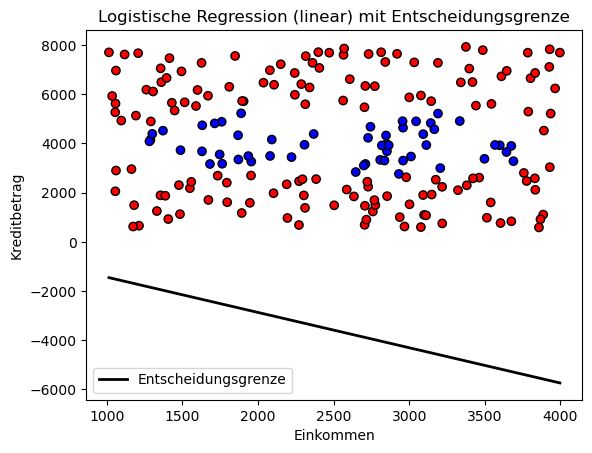

In [22]:
import numpy as np

# Erzeuge viele Werte für Einkommen
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
# Berechne die Grenze für den Kreditbetrag anhand der logistischen Regression-Koeffizienten:
# Die Entscheidungsgrenze ist dort, wo das Modell 0.5 Wahrscheinlichkeit für beide Klassen hat.
# Formel für Grenze: 0 = w0 + w1*x1 + w2*x2  ->  x2 = -(w0 + w1*x1) / w2
w0 = logreg.intercept_[0]
w1 = logreg.coef_[0][0]
w2 = logreg.coef_[0][1]
y_values = -(w0 + w1 * x_values) / w2

# Plot wie vorher, aber jetzt mit Entscheidungsgerade
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
plt.plot(x_values, y_values, color='black', linewidth=2, label='Entscheidungsgrenze')
plt.xlabel('Einkommen')
plt.ylabel('Kreditbetrag')
plt.title('Logistische Regression (linear) mit Entscheidungsgrenze')
plt.legend()
plt.show()
